# Backpropagation 
Deep Learning - KI29  
Deggendorf Institute of Technology  
Prof. Dr. Florian Wahl


## Startpunkt

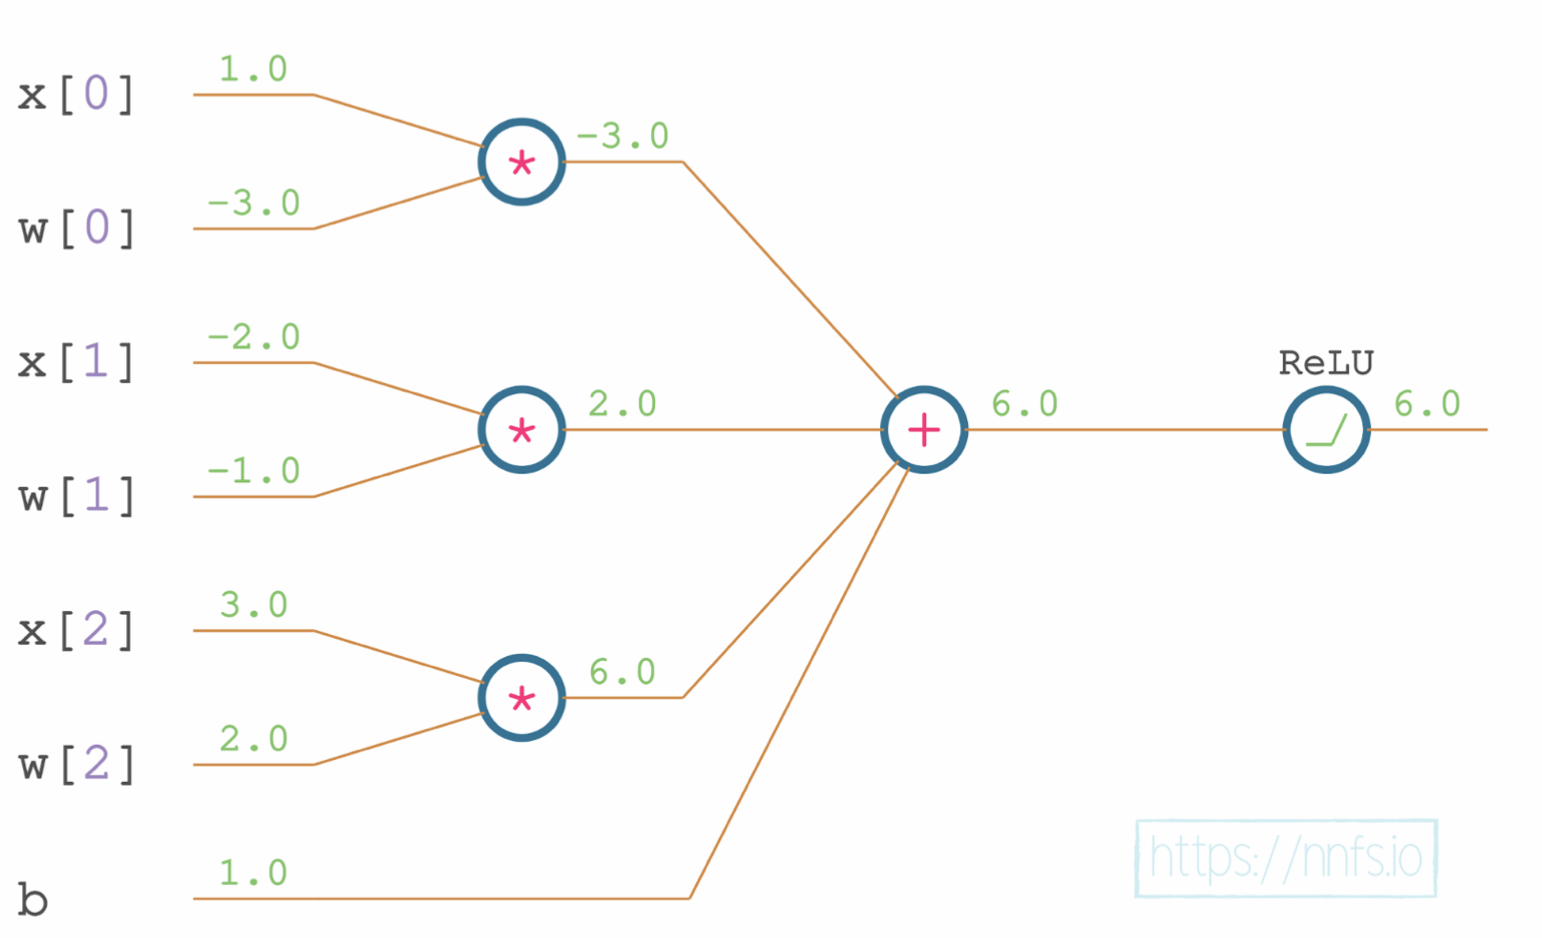

In [1]:
# Forward pass
x = [1.0, -2.0, 3.0]  # input values
w = [-3.0, -1.0, 2.0]  # weights
b = 1.0  # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

In [2]:
y

6.0

## Schrittweise Backpropagation

Annahme: Wir bekommen vom vorhergehenden Layer 1.0 als Gradient "rein"

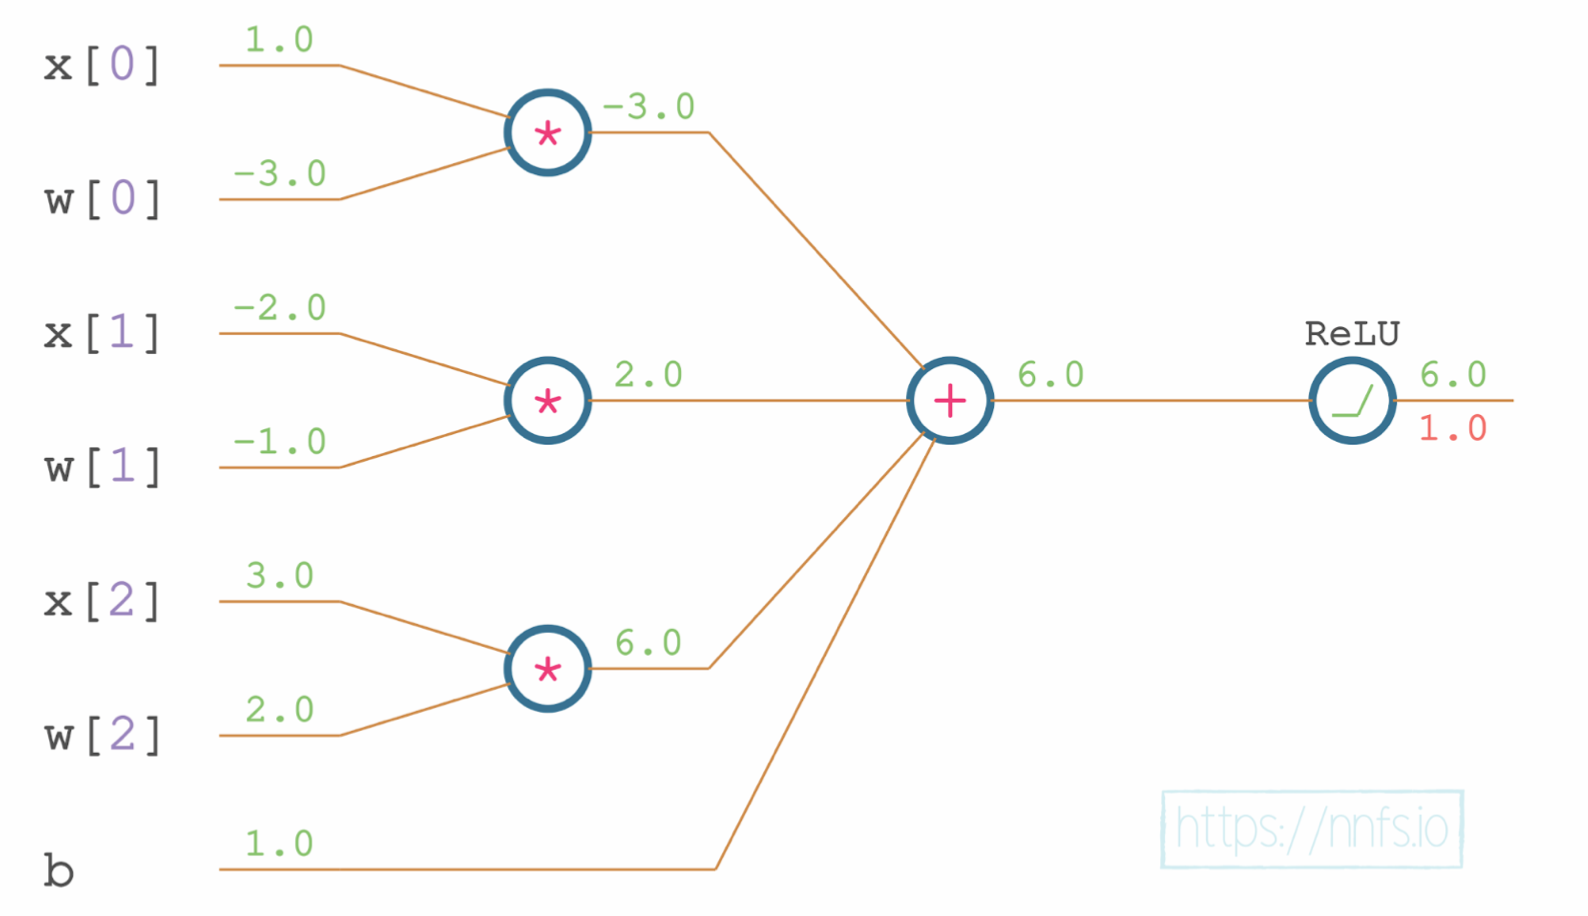

In [4]:
# Backward pass

# The derivative from the next layer
dvalue = 1.0

ReLU Ableitung $f_a(x)=\mathrm{max(x, 0)}$ kann als Code geschrieben werden:

In [5]:
# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(f"drelu_dz = {drelu_dz}")

drelu_dz = 1.0


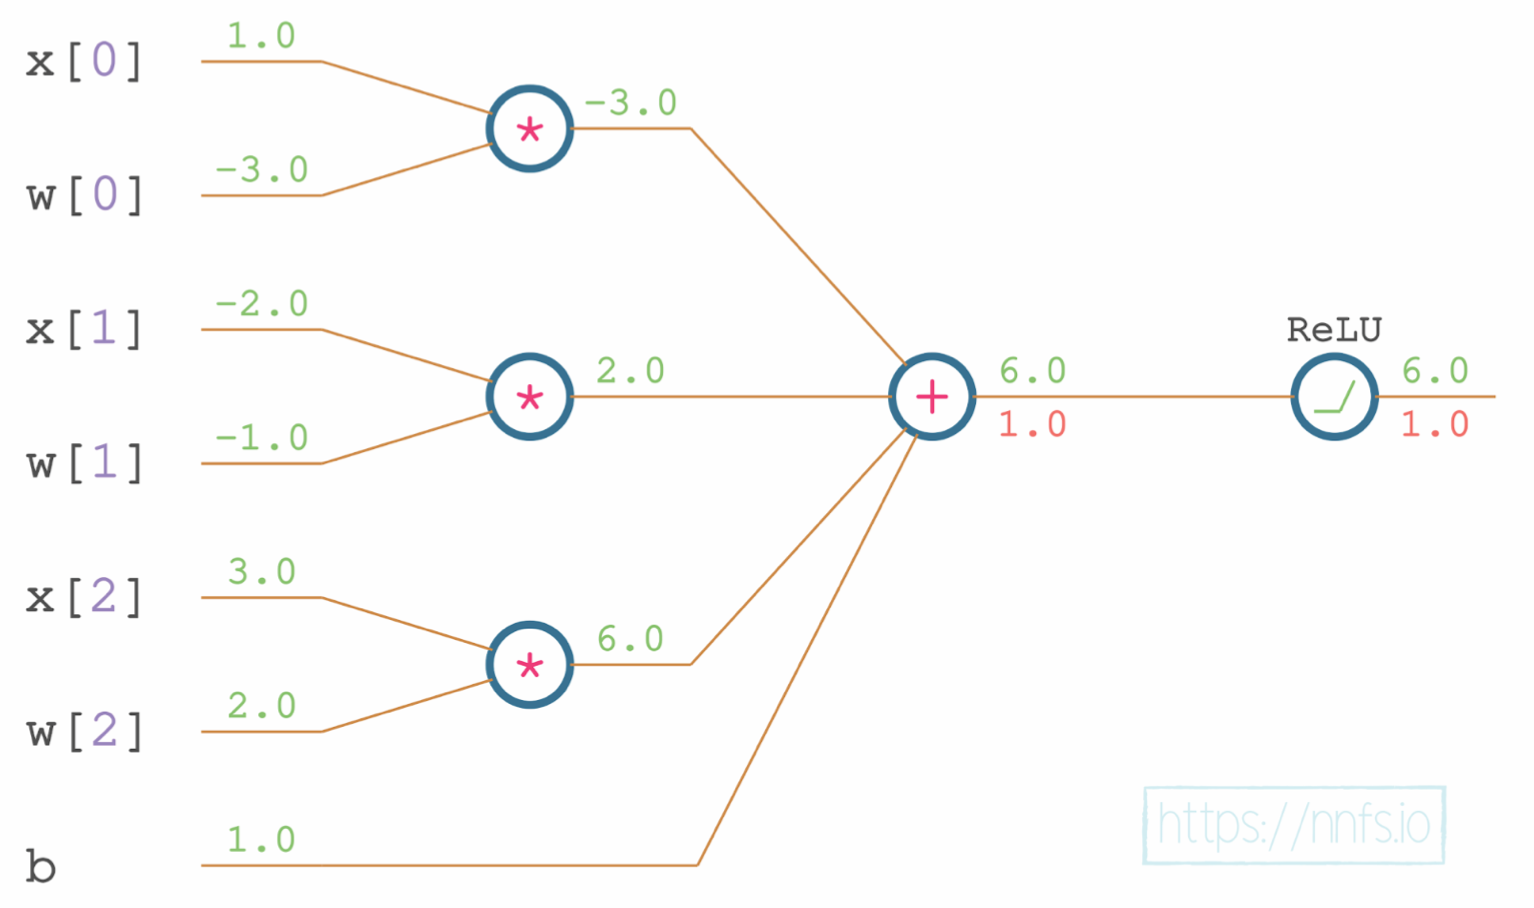

Für die Summe ist die partielle Ableitung immer 1, da hier alle Eingänge nur 1. Ordnung sind. Beispiel:  

$f(x, y) = x+y$

$\frac{\partial{}f}{\partial{}x}=1$

$\frac{\partial{}f}{\partial{}y}=1$

Daher ist die partielle Ableitung der Summe aus $x_0w_0+x_1w_1+x_2w_2+b$ hier immer 1.

In [6]:
# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(f"drelu_dxw0 = {drelu_dxw0}")

drelu_dxw0 = 1.0


In [7]:
dsum_dxw1 = 1
drelu_dxw1 = drelu_dz * dsum_dxw1
print(f"drelu_dxw1 = {drelu_dxw1}")

drelu_dxw1 = 1.0


In [8]:
dsum_dxw2 = 1
drelu_dxw2 = drelu_dz * dsum_dxw2
print(f"drelu_dxw2 = {drelu_dxw2}")

drelu_dxw2 = 1.0


In [9]:
dsum_db = 1
drelu_db = drelu_dz * dsum_db
print(f"drelu_db = {drelu_db}")

drelu_db = 1.0


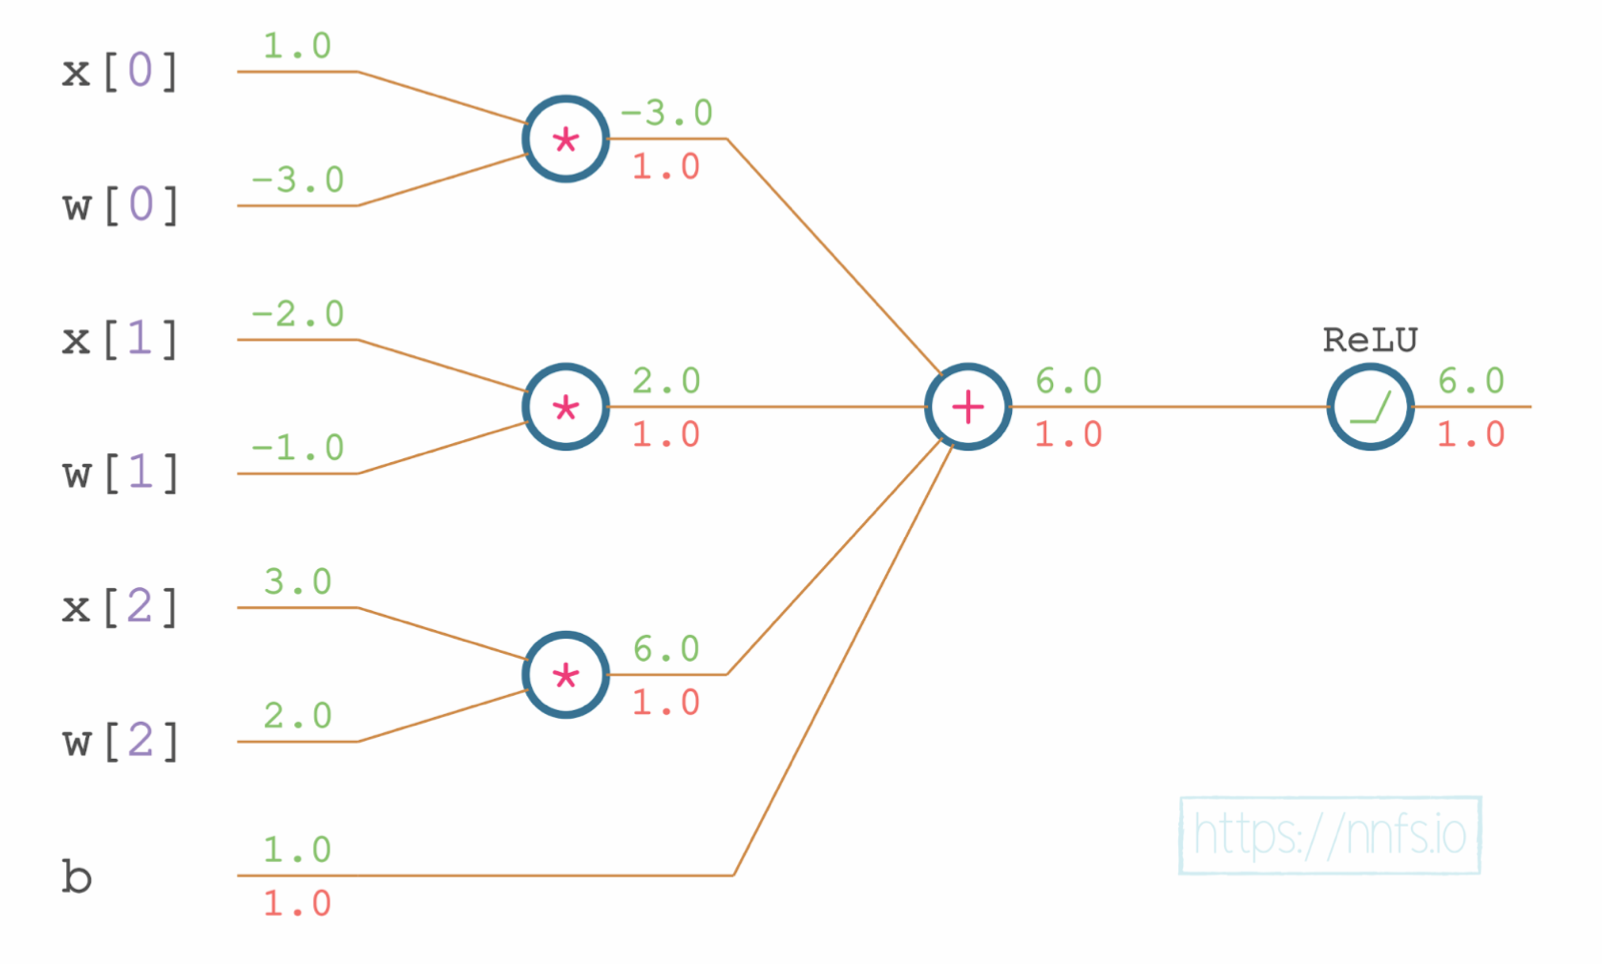

Nun folgt der letzte Schritt: Wir müssen noch die Multiplikationen ableiten. Hier ist die partielle Ableitung immer jeweils "der andere" Faktor:  
$f(x, y) = x\cdot{}y$  

$\frac{\partial{}f}{\partial{}x}=y$

$\frac{\partial{}f}{\partial{}y}=x$

In [10]:
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0
print(f"drelu_dx0 = {drelu_dx0}")

dmul_dx1 = w[1]
drelu_dx1 = drelu_dxw1 * dmul_dx1
print(f"drelu_dx1 = {drelu_dx1}")


dmul_dx2 = w[2]
drelu_dx2 = drelu_dxw2 * dmul_dx2
print(f"drelu_dx2 = {drelu_dx2}")

drelu_dx0 = -3.0
drelu_dx1 = -1.0
drelu_dx2 = 2.0


In [11]:
dmul_dw0 = x[0]
drelu_dw0 = drelu_dxw0 * dmul_dw0
print(f"drelu_dw0 = {drelu_dw0}")

dmul_dw1 = x[1]
drelu_dw1 = drelu_dxw1 * dmul_dw1
print(f"drelu_dw1 = {drelu_dw1}")


dmul_dw2 = x[2]
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(f"drelu_dw2 = {drelu_dw2}")

drelu_dw0 = 1.0
drelu_dw1 = -2.0
drelu_dw2 = 3.0


In [12]:
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]

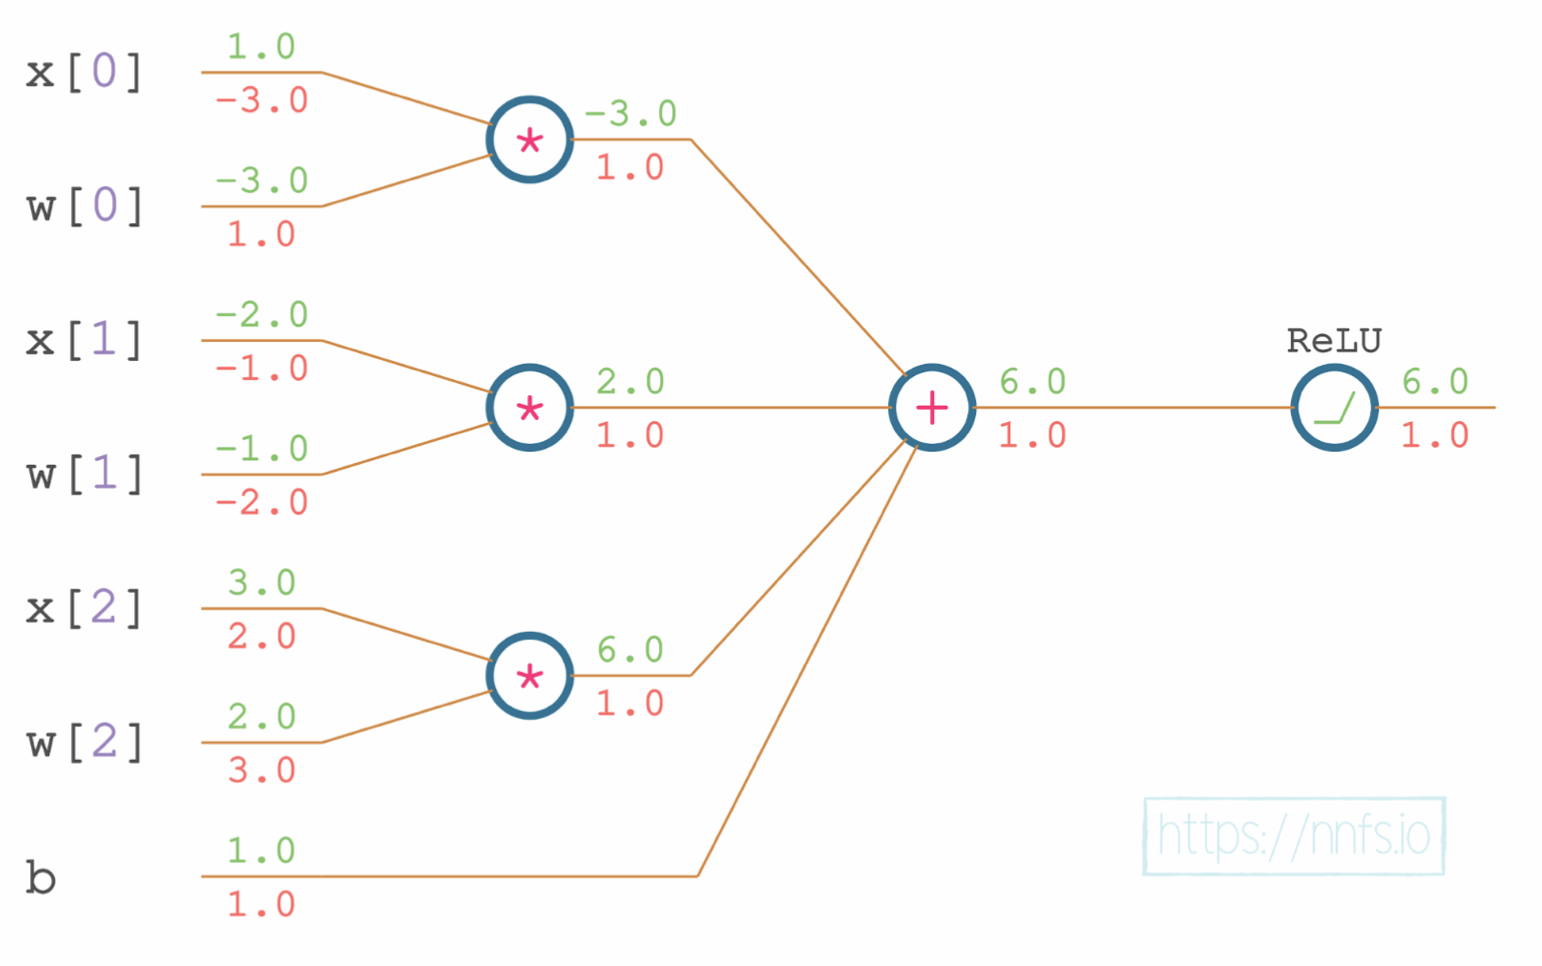

*Wichtig:* Die Differentiale der weights werden zum Optimieren benötigt. Die Differentiale der inputs werden benötigt, um diese an die davorliegenden Neuronen weiterzugeben.

### Mathematische Vereinfachung

In [13]:
drelu_dx0 = drelu_dxw0 * dmul_dx0

In [14]:
dmul_dx0 = w[0]

In [15]:
drelu_dx0 = drelu_dxw0 * w[0]

In [16]:
drelu_dxw0 = drelu_dz * dsum_dxw0

In [17]:
dsum_dxw0 = 1

In [18]:
drelu_dxw0 = drelu_dz * 1

In [19]:
drelu_dz = dvalue * (1. if z > 0 else 0.)

In [20]:
drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]

In [21]:
# Gradienten
dx = [drelu_dx0, drelu_dx1, drelu_dx2]  # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2]  # gradients on weights
db = drelu_db  # gradient on bias...just 1 bias here

## Backpropagation für ein Layer

In [22]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])

# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum([weights[0][0]*dvalues[0][0], 
           weights[0][1]*dvalues[0][1],
           weights[0][2]*dvalues[0][2]])

dx1 = sum([weights[1][0]*dvalues[0][0], 
           weights[1][1]*dvalues[0][1],
           weights[1][2]*dvalues[0][2]])

dx2 = sum([weights[2][0]*dvalues[0][0], 
           weights[2][1]*dvalues[0][1],
           weights[2][2]*dvalues[0][2]])

dx3 = sum([weights[3][0]*dvalues[0][0], 
           weights[3][1]*dvalues[0][1],
           weights[3][2]*dvalues[0][2]])

dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [23]:
# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum(weights[0]*dvalues[0])
dx1 = sum(weights[1]*dvalues[0])
dx2 = sum(weights[2]*dvalues[0])
dx3 = sum(weights[3]*dvalues[0])

dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [24]:
# Als Kreuzprodukt
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


In [25]:
# Samples als Batch
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Das war nun die Gradienten mit Bezug auf die Inputs. Nun brauchen wir noch die Gradienten mit Bezug auf die Gewichte.

In [26]:
inputs = np.array([[1, 2, 3, 2.5],
                   [2., 5., -1., 2],
                   [-1.5, 2.7, 3.3, -0.8]])
dweights = np.dot(inputs.T, dvalues)
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


Es fehlen jetzt noch die Ableitungen mit Bezug auf die Biases. Diese sind unabhängig von den Biases selbst, sondern nur eine Summe über die angelegten Gradienten aus dem folgenden Layer.

In [27]:
biases = np.array([[2, 3, 0.5]])

dbiases = np.sum(dvalues, axis=0, keepdims=True)
print(dbiases)

[[6. 6. 6.]]


Das letzte Puzzlestück ist die Ableitung der ReLU Aktivierungsfunktion.

In [29]:
# Example layer output
z = np.array([[1, 2, -3, -4],
            [2, -7, -1, 3],
            [-1, 2, 5, -1]])

dvalues = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])

# ReLU activation's derivative
drelu = np.zeros_like(z)
drelu[z > 0] = 1
print(drelu)

# The chain rule
drelu *= dvalues
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


Vereinfacht kann man sich die `dvalues` kopieren und dann einfach alle Elemente auf Null setzen, die nicht positiv sind.

In [30]:
# ReLU activation's derivative
# with the chain rule applied
drelu = dvalues.copy()
drelu[z <= 0] = 0
print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


### Komplettes Beispiel

In [31]:
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                  [2., 2., 2.],
                  [3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                 [2., 5., -1., 2],
                 [-1.5, 2.7, 3.3, -0.8]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                  [0.5, -0.91, 0.26, -0.5],
                  [-0.26, -0.27, 0.17, 0.87]]).T

# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])
# Forward pass
layer_outputs = np.dot(inputs, weights) + biases  # Dense layer
relu_outputs = np.maximum(0, layer_outputs)  # ReLU activation
# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0
# Dense layer
# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)
# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)
# dbiases - sum values, do this over samples (first axis), keepdims # since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(drelu, axis=0, keepdims=True)
# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases
print(weights)
print(biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


## Nun wollen wir das neu Gelernte in unsere Codebase einbauen

In [32]:
# Dense Layer
class Layer_Dense:
    
    # Initialization Code
    def __init__(self, n_inputs, n_neurons):
        # Initilalize weights and biases according to the shape given
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        # Calculate output as we did on the slides
        self.output = np.dot(inputs, self.weights) + self.biases
        
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on inputs
        self.dinputs = np.dot(dvalues, self.weights.T)

In [33]:
class Activation_ReLU:
    
    def forward(self, inputs):
        # Calculate the output based on inputs. 
        self.inputs = inputs
        self.output = np.maximum(0, inputs)
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        seld.dinputs[self.inputs <= 0] = 0

In [34]:
class Loss:
    def calculate(self, output, y):
        # Calculate the per sample loss
        samples_losses = self.forward(output, y)

        # Calculate the mean loss and return it
        loss = np.mean(samples_losses)
        return loss

In [36]:
class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        n_samples = len(y_pred)  # Count the samples

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)  # Clip the predictions

        # Get correct confidence values
        # if labels are sparse
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(n_samples), y_true]

        # else if labels are one hot encoded
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # Compute Losses
        losses = -np.log(correct_confidences)
        return losses
    
    # Backward pass
    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

In [37]:
# Softmax activation
class Activation_Softmax:
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) 
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True) 
        
        # Normalize them for each sample
        self.output = probabilities
    
    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)

        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

In [40]:
class Activation_Softmax_Loss_CategoricalCrossentropy():
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

### Vergleich zw. Kreuzentropie und Softmax separat vs. kombiniert

In [41]:
softmax_outputs = np.array([[.7, .1, .2], 
                            [.1, .5, .4], 
                            [.02, .9, .08]])

class_targets = np.array([0, 1, 1])


softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs


activation = Activation_Softmax()
activation.output = softmax_outputs

loss = Loss_CategoricalCrossentropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs

print("Kombiniert:")
print(dvalues1)


print("Separate:")
print(dvalues2)


print("diff")
print(dvalues1 - dvalues2)

Kombiniert:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Separate:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
diff
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.67361738e-19  0.00000000e+00 -3.46944695e-18]]


In [48]:
from timeit import timeit

softmax_outputs = np.array([[.7, .1, .2], 
                            [.1, .5, .4], 
                            [.02, .9, .08]])

class_targets = np.array([0, 1, 1])

def f1():
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs

def f2():
    activation = Activation_Softmax()
    activation.output = softmax_outputs
    
    loss = Loss_CategoricalCrossentropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs

t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number=10000)

print(t2/t1)

2.1603647533670642
